In [44]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

import os

In [45]:
os.getcwd()

'/content'

In [85]:
# update file path depending in your folder structure
file='/content/v5_20240204_150730_57m.csv'

In [86]:
df=pd.read_csv(file)
print(df.shape)

(120880, 44)


In [87]:
df.head()

Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0  04-Feb-2024 15:07:30.572    -0.0191    -0.4553    -0.9112        -0.0046   
1  04-Feb-2024 15:07:30.575    -0.0191    -0.4553    -0.9112        -0.0046   
2  04-Feb-2024 15:07:30.582    -0.0027    -0.4305    -0.8996        -0.0089   
3  04-Feb-2024 15:07:30.592    -0.0030    -0.4267    -0.8973         0.0086   
4  04-Feb-2024 15:07:30.602    -0.0046    -0.4072    -0.8952         0.0053   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0        -0.0283        -0.0133        0.1608       -0.2703       -0.1166   
1        -0.0283        -0.0133        0.1608       -0.2703       -0.1166   
2        -0.0148        -0.0070        0.1120       -0.2562       -0.0854   
3         0.0063         0.0021        0.0393       -0.1595       -0.0719   
4         0.0094         0.0032       -0.0469       -0.0655       -0.0664   

   ...  ActivityType  ActivityConfidence  Pressure(kilopascals)  \
0  ...       Unknown                 Low                92.0526   
1  ...       Unknown                 Low                92.0526   
2  ...       Unknown                 Low                92.0526   
3  ...       Unknown                 Low                92.0526   
4  ...       Unknown                 Low                92.0526   

   RelativeAltitude(meters)  magX(µT)  magY(µT)  magZ(µT)  calMagX(µT)  \
0                   -0.0106  602.5664  -90.8178 -263.3469      19.3366   
1                   -0.0106  602.4935  -90.9008 -263.2549      19.3366   
2                   -0.0106  602.4935  -90.9008 -263.2549      19.2643   
3                   -0.0106  602.4935  -90.9008 -263.2549      19.2943   
4                   -0.0106  602.4935  -90.9008 -263.2549      19.2432   

   calMagY(µT)  calMagZ(µT)  
0     -30.1109     -32.1170  
1     -30.1109     -32.1170  
2     -30.1139     -32.0779  
3     -30.0041     -32.2354  
4     -30.1386     -32.3034  

[5 rows x 44 columns]

### Drop duplicates

In [88]:
df.duplicated().sum()

63

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
#Verify
print('initial shape \n(1232547, 44)')
print(df.shape)

initial shape 
(1232547, 44)
(120817, 44)


### Convert time series

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120817 entries, 0 to 120879
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Timestamp                 120817 non-null  object 
 1   accelX(g)                 120817 non-null  float64
 2   accelY(g)                 120817 non-null  float64
 3   accelZ(g)                 120817 non-null  float64
 4   accelUserX(g)             120817 non-null  float64
 5   accelUserY(g)             120817 non-null  float64
 6   accelUserZ(g)             120817 non-null  float64
 7   gyroX(rad/s)              120817 non-null  float64
 8   gyroY(rad/s)              120817 non-null  float64
 9   gyroZ(rad/s)              120817 non-null  float64
 10  Roll(rads)                120817 non-null  float64
 11  Pitch(rads)               120817 non-null  float64
 12  Yaw(rads)                 120817 non-null  float64
 13  m11                       120816 non-null  f

In [92]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df,
                 x=df['Timestamp'],
                 y=df['Alt(m)'])

# Update the layout with title and axis labels
fig.update_layout(
        title='Altitude over Time',
        xaxis_title='Timestamp',
        yaxis_title='Altitude (m)',
        coloraxis_colorbar=dict(title='Cluster Label')
    )

# Show the Plotly figure
fig.show()

In [93]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ns')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120817 entries, 0 to 120879
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Timestamp                 120817 non-null  datetime64[ns]
 1   accelX(g)                 120817 non-null  float64       
 2   accelY(g)                 120817 non-null  float64       
 3   accelZ(g)                 120817 non-null  float64       
 4   accelUserX(g)             120817 non-null  float64       
 5   accelUserY(g)             120817 non-null  float64       
 6   accelUserZ(g)             120817 non-null  float64       
 7   gyroX(rad/s)              120817 non-null  float64       
 8   gyroY(rad/s)              120817 non-null  float64       
 9   gyroZ(rad/s)              120817 non-null  float64       
 10  Roll(rads)                120817 non-null  float64       
 11  Pitch(rads)               120817 non-null  float64       
 12  Ya

### Reduce sampling rate

In [94]:
# Set the 'Timestamp' column as the DataFrame's index
df.set_index('Timestamp', inplace=True)

In [95]:
# resample the DataFrame to have roughly one snapshot per second and select the first value within each second
df_resampled = df.resample('S').first()
df_resampled.shape

(1206, 43)

In [96]:
# Reset the index to create a standard numerical index
df_resampled.reset_index(inplace=True)

In [97]:
df_resampled.shape

(1206, 44)

In [98]:
# export to CSV
df_resampled.to_csv('df_57_resampled.csv', index=False)

### Label data to prepare for supervised learning

In [99]:
file_resampled='/content/df_57_resampled.csv'
df=pd.read_csv(file_resampled)
print(df.shape)
df.head()

(1206, 44)


Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0  2024-02-04 15:07:30    -0.0191    -0.4553    -0.9112        -0.0046   
1  2024-02-04 15:07:31    -0.0040    -0.4222    -0.9004        -0.0002   
2  2024-02-04 15:07:32    -0.1664    -0.3852    -0.8514        -0.0607   
3  2024-02-04 15:07:33    -0.1632    -0.5227    -0.8696        -0.0084   
4  2024-02-04 15:07:34    -0.1351    -0.4991    -0.8588         0.0019   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0        -0.0283        -0.0133        0.1608       -0.2703       -0.1166   
1        -0.0015        -0.0056       -0.0970       -0.2802       -0.0899   
2         0.0400         0.0273       -0.0877       -0.4931       -0.5785   
3        -0.0155        -0.0249        0.0932        0.0004       -0.1276   
4        -0.0056        -0.0126       -0.0948        0.0685       -0.0194   

   ...  ActivityType  ActivityConfidence  Pressure(kilopascals)  \
0  ...       Unknown                 Low                92.0526   
1  ...       Unknown                 Low                92.0526   
2  ...       Unknown                 Low                92.0527   
3  ...       Unknown                 Low                92.0527   
4  ...       Unknown                 Low                92.0525   

   RelativeAltitude(meters)  magX(µT)  magY(µT)  magZ(µT)  calMagX(µT)  \
0                   -0.0106  602.5664  -90.8178 -263.3469      19.3366   
1                   -0.0106  603.2658  -89.7164 -263.8329      20.0162   
2                   -0.0211  600.2962  -85.5059 -268.6235      17.1499   
3                   -0.0211  599.3859  -87.8468 -267.1334      16.2128   
4                    0.0000  599.7586  -89.1160 -266.0229      16.5197   

   calMagY(µT)  calMagZ(µT)  
0     -30.1109     -32.1170  
1     -28.8317     -32.7186  
2     -24.7723     -37.3982  
3     -27.0695     -36.1744  
4     -28.4623     -34.7038  

[5 rows x 44 columns]

In [100]:
# drop rows with missing values
print('initial shape (12374, 44)')
df.dropna(inplace=True)
print(f'new shape: {df.shape}')

initial shape (12374, 44)
new shape: (1206, 44)


In [103]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df_resampled,
                 x=df_resampled['Timestamp'],
                 y=df_resampled['Alt(m)'])

# Update the layout with title and axis labels
fig.update_layout(
        title='Altitude over Time',
        xaxis_title='Timestamp',
        yaxis_title='Altitude (m)',
        coloraxis_colorbar=dict(title='Cluster Label')
    )

# Show the Plotly figure
fig.show()

In [102]:
# Initialize 'on_lift' column to 0
df['on_lift'] = 0

In [114]:
# Manually noted timestamps for lift rides
lift_rides = [
    ('2024-02-04 15:07:47', '2024-02-04 15:10:30'),
    ('2024-02-04 15:15:52', '2024-02-04 15:17:57'),
]

In [115]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [117]:
# update 'on_lift' column
for start, end in lift_rides:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    df.loc[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time), 'on_lift'] = 1

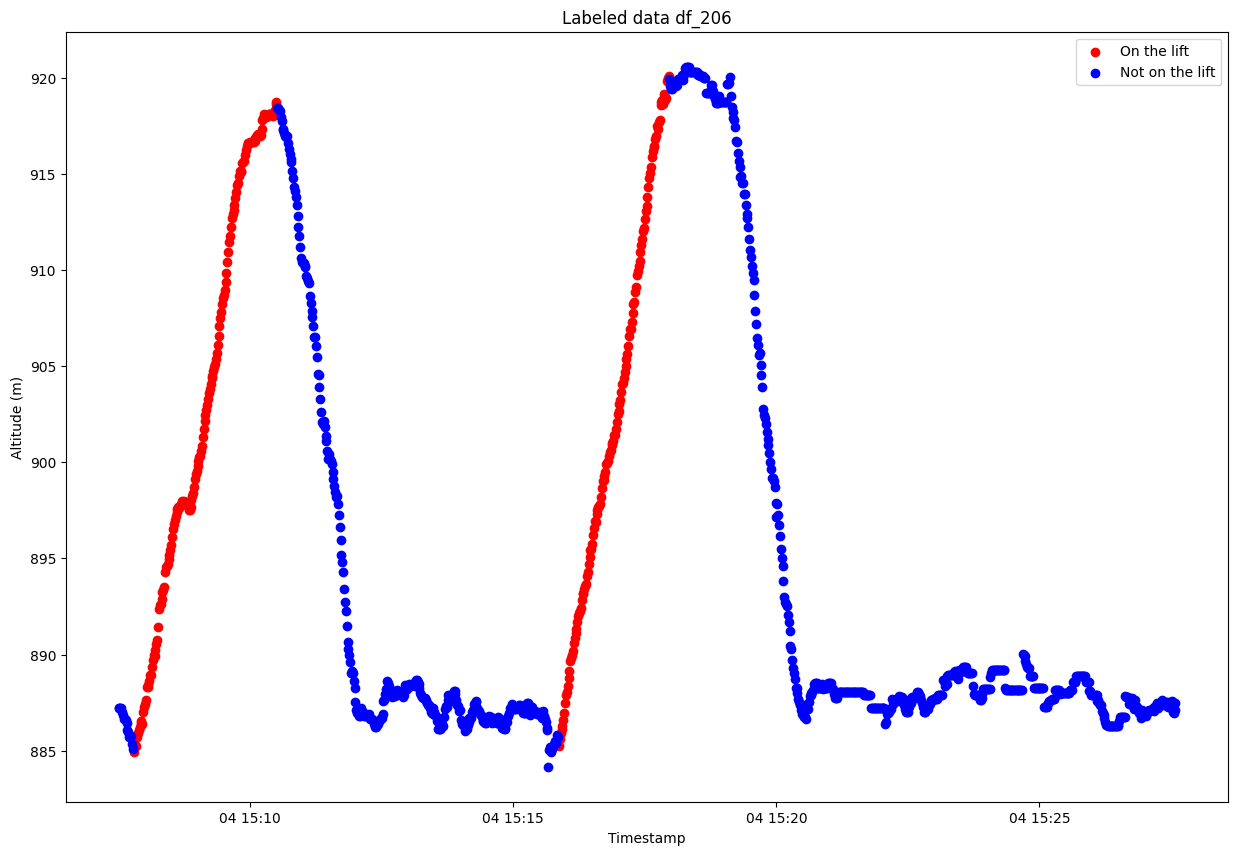

In [118]:
plt.figure(figsize=(15, 10))

# Plot points where 'on_lift' is 1 with one color
plt.scatter(df.loc[df['on_lift'] == 1, 'Timestamp'],
            df.loc[df['on_lift'] == 1, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot points where 'on_lift' is 0 with another color
plt.scatter(df.loc[df['on_lift'] == 0, 'Timestamp'],
            df.loc[df['on_lift'] == 0, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Labeled data df_206')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()

In [119]:
# export to CSV
df.to_csv('df_57_labeled_on_lift.csv', index=False)